<a href="https://colab.research.google.com/github/Sandra877/CryptographyICS2411Labs/blob/main/SWKStocksAsignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving equity_stocks.csv to equity_stocks.csv


In [ ]:
# Load the data
file_path = 'equity_stocks.csv'
data = pd.read_csv(file_path)  # Use display to show the DataFrame in a Jupyter-friendly format

In [ ]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
0,1/3/2012,EQTY,Equity Bank,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700",-,NaN,NaN
1,1/4/2012,EQTY,Equity Bank,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500",-,NaN,NaN
2,1/5/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",-,NaN,NaN
3,1/6/2012,EQTY,Equity Bank,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000",-,NaN,NaN
4,1/9/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000",-,NaN,NaN


In [ ]:
data.isnull().sum()

,0
DATE,248
CODE,0
NAME,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Day Price,0
Previous,0
Change,0


In [ ]:
# Filter for Equity Bank data
eqty_data = data[data['CODE'] == 'EQTY']

In [ ]:
# Display the filtered DataFrame
print("Filtered Data for Equity Bank (EQTY):")
display(eqty_data)  # Show the filtered DataFrame

Filtered Data for Equity Bank (EQTY):


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
47,1/3/2012,EQTY,Equity Bank,18.5,34.25,16.5,17,16.7,16.4,0.3,1.80%,"141,700",<NA>
111,1/4/2012,EQTY,Equity Bank,18.5,34.25,16.4,16.8,16.55,16.7,-0.15,0.91%,"912,500",<NA>
175,1/5/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",<NA>
239,1/6/2012,EQTY,Equity Bank,18.5,34.25,15.5,16,15.8,16.15,-0.35,2.22%,"3,510,000",<NA>
303,1/9/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.5,15.95,15.8,0.15,0.94%,"1,090,000",<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,12/21/2012,EQTY,Equity Bank,19,34.25,23,24,23.5,23.75,-0.25,1.06%,"424,300",<NA>
15835,12/24/2012,EQTY,Equity Bank,19,34.25,23.5,24,23.5,23.5,<NA>,<NA>,"488,300",<NA>
15899,12/27/2012,EQTY,Equity Bank,19,34.25,23.5,24,23.75,23.5,0.25,1.05%,"216,700",<NA>
15963,12/28/2012,EQTY,Equity Bank,19,34.25,23.75,24,23.75,23.75,<NA>,<NA>,"692,200",<NA>


In [ ]:
# Remove columns with a lot of missing values, and the Code and Name
columns = ['Adjust', 'Date', 'Adjusted', 'CODE', 'NAME']

data = data.drop(columns, axis=1)

data.head()

,DATE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
0,1/3/2012,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700"
1,1/4/2012,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500"
2,1/5/2012,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700"
3,1/6/2012,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000"
4,1/9/2012,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000"


In [ ]:
# Drop rows that have missing values
data= data.dropna(subset=['DATE'])

data.isna().sum()

,0
DATE,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Day Price,0
Previous,0
Change,0
Change%,0
Volume,0


In [ ]:
# Convert date column to datetime type
data["DATE"] = pd.to_datetime(data['DATE'], format='%d/%m/%Y', errors='coerce')


# Extract Date Data to Different Columns
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
data['day'] = data['DATE'].dt.day

# Drop the date column
data = data.drop("DATE", axis=1)

data.head()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,year,month,day
0,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700",2012.0,3.0,1.0
1,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500",2012.0,4.0,1.0
2,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",2012.0,5.0,1.0
3,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000",2012.0,6.0,1.0
4,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000",2012.0,9.0,1.0


In [ ]:
data = data.replace('-', np.nan)

data.isna().sum()

,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Day Price,0
Previous,0
Change,318
Change%,318
Volume,0
year,765


In [ ]:
# Remove columns with a lot of missing values, and the Code and Name
columns = ['year', 'month', 'day', 'Change%', 'Change']

data = data.drop(columns, axis=1)

data.head()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume
0,18.5,34.25,16.5,17.00,16.70,16.40,"141,700"
1,18.5,34.25,16.4,16.80,16.55,16.70,"912,500"
2,18.5,34.25,15.8,16.75,16.15,16.55,"748,700"
3,18.5,34.25,15.5,16.00,15.80,16.15,"3,510,000"
4,18.5,34.25,15.8,16.50,15.95,15.80,"1,090,000"


In [ ]:
# Remove commas and convert to numeric
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)

data.isna().sum()

,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Day Price,0
Previous,0
Volume,0


In [ ]:
from sklearn.model_selection import train_test_split


np.random.seed(42)

# Create the data
X = data.drop('Day Price', axis=1)
y = data['Day Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,12m Low,12m High,Day Low,Day High,Previous,Volume
66,19.50,36.50,19.30,19.5,19.25,4630000.0
67,19.50,36.50,19.40,19.6,19.40,7510000.0
382,19.55,36.50,16.35,16.8,16.55,5660000.0
211,19.00,34.25,24.00,24.5,24.25,3040000.0
12,18.50,34.25,15.90,16.0,15.90,2100000.0


In [ ]:
#predictions
#k nearest neigbour
from sklearn.neighbors import KNeighborsRegressor as KNN


np.random.seed(42)

# Initiate the model
knn = KNN(n_neighbors=7)

# Fit the model
knn.fit(X_train, y_train)

# Check score
knn.score(X_test, y_test)

0.4778416017351387

In [ ]:
#linear regression

In [ ]:
from sklearn.linear_model import LinearRegression


np.random.seed(42)

# Initiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Check score
lr.score(X_test, y_test)

0.9997403267601818

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression


np.random.seed(42)

# Initiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Check score
lr.score(X_test, y_test)

0.9997403267601818

In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor as RFR


np.random.seed(42)

# Initiate the model
rf = RFR()

# Fit the model
rf.fit(X_train, y_train)

# Check score
rf.score(X_test, y_test)

0.9989781750886335

In [ ]:
#evaluation
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

models = {
    "KNeighbors Regressor": knn,
    "Linear Regressor": lr,
    "Random Forest Regressor": rf
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[name] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-square (R2)": r2
    }

# Convert the dictionary to a DataFrame
table = pd.DataFrame(results).T
table

,Mean Squared Error,Root Mean Squared Error,R-square (R2)
KNeighbors Regressor,1967.948608,44.361567,0.477842
Linear Regressor,0.978675,0.989280,0.999740
Random Forest Regressor,3.851128,1.962429,0.998978


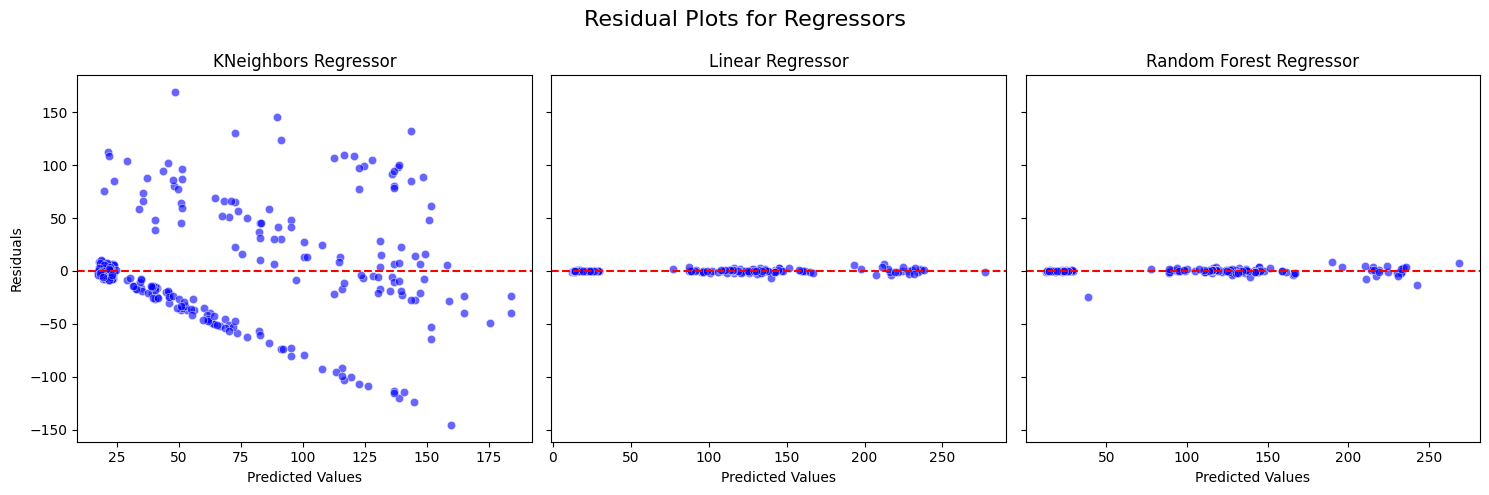

In [ ]:
#residual plot
# Initialize a plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)
fig.suptitle("Residual Plots for Regressors", fontsize=16)

# Loop through models to create residual plots
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals
    ax = axes[i]
    sns.scatterplot(x=y_pred, y=residuals, ax=ax, color='blue', alpha=0.6)
    ax.axhline(0, color='red', linestyle='--')  # Horizontal line at residual = 0
    ax.set_title(name)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals" if i == 0 else "")  # Only label y-axis for first plot

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()
